# CD8细胞分析重要综述:
https://doi.org/10.1038/s41577-021-00574-3

NK细胞分析重要综述：https://mp.weixin.qq.com/s/WxJ793tSi5zoqtbnN7mMVA

# Loading

In [1]:
!pip install scltnn
!pip install scvelo
!pip install pyomic
!pip install anndata
!pip install sccoda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 KB 421.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 3.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=792a42521cebf771584a50960ed6e58969c1b77fb0ce48aab440f027d5e564e2
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a89

In [3]:
!pip install docrep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19896 sha256=0a33e5ca79c3be3b36bfaa1f7840f4b438777442062bc0fe8577c7b03117b81a
  Stored in directory: /root/.cache/pip/wheels/48/f0/c9/3928c369e4e0aae8c3daa3c36e5ddf982aed49d3196addc1f0
Successfully built docrep


In [4]:

#导入包
import anndata
print('anndata(Ver): ',anndata.__version__)
import scanpy as sc
print('scanpy(Ver): ',sc.__version__)
import scltnn #非必需
print('scltnn(Ver): ',scltnn.__version__)
import matplotlib.pyplot as plt
import matplotlib
print('matplotlib(Ver): ',matplotlib.__version__)
import seaborn as sns
print('seaborn(Ver): ',sns.__version__)
import numpy as np
print('numpy(Ver): ',np.__version__)
import pandas as pd
print('pandas(Ver): ',pd.__version__)
import scvelo as scv
print('scvelo(Ver): ',scv.__version__)

anndata(Ver):  0.8.0
scanpy(Ver):  1.9.3
scltnn(Ver):  0.0.9
matplotlib(Ver):  3.5.3
seaborn(Ver):  0.11.2
numpy(Ver):  1.22.4
pandas(Ver):  1.5.3
scvelo(Ver):  0.2.5


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sc_color=['#7CBB5F',
 '#368650',
 '#A499CC',
 '#5E4D9A',
 '#78C2ED',
 '#866017',
 '#9F987F',
 '#E0DFED',
 '#EF7B77',
 '#279AD7',
 '#F0EEF0',
 '#1F577B',
 '#A56BA7',
 '#E0A7C8',
 '#E069A6',
 '#941456',
 '#FCBC10',
 '#EAEFC5',
 '#01A0A7',
 '#75C8CC',
 '#F0D7BC',
 '#D5B26C',
 '#D5DA48',
 '#B6B812',
 '#9DC3C3',
 '#A89C92',
 '#FEE00C',
 '#FEF2A1']

In [ ]:
#绘图参数设置
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [6]:
adata = sc.read('/content/drive/MyDrive/Gastric/Data/Gastric_anno.h5ad')
adata

AnnData object with n_obs × n_vars = 63398 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [7]:
adata.to_df()

A2M     A2ML1     ABCA8    ABI3BP  AC000120.1  \
AAACCTGAGACCTAGG-1_0  -0.203137 -0.003784 -0.096392 -0.119165   -0.009232   
AAACCTGAGACGCACA-1_0  -0.143996 -0.010344 -0.079070 -0.105179   -0.016929   
AAACCTGAGCTCCTCT-1_0  -0.189924 -0.004023 -0.093359 -0.110739   -0.009315   
AAACCTGAGGCTCAGA-1_0  -0.199772 -0.006220 -0.093997 -0.127288   -0.012425   
AAACCTGCACTTAAGC-1_0  -0.143241 -0.008443 -0.080204 -0.096420   -0.014378   
...                         ...       ...       ...       ...         ...   
TTTGTCATCAACACCA-1_11 -0.198075 -0.005647 -0.094020 -0.123596   -0.011630   
TTTGTCATCGGCGGTT-1_11 -0.160848 -0.006211 -0.085551 -0.099378   -0.011714   
TTTGTCATCTCGATGA-1_11 -0.130057 -0.008732 -0.077143 -0.088231   -0.014527   
TTTGTCATCTGCAAGT-1_11 -0.203955 -0.005599 -0.095330 -0.127597   -0.011671   
TTTGTCATCTGTGCAA-1_11 -0.185640 -0.006974 -0.090413 -0.120430   -0.013178   

                       AC002331.1  AC004034.1  AC004080.4  AC004231.3  \
AAACCTGAGACCTAGG-1_0    -0.008480   -0.007610    0.000028   -0.005997   
AAACCTGAGACGCACA-1_0    -0.006245   -0.004731   -0.013406   -0.005786   
AAACCTGAGCTCCTCT-1_0    -0.003921   -0.007786   -0.000350   -0.003901   
AAACCTGAGGCTCAGA-1_0    -0.015184   -0.006068   -0.005150   -0.009433   
AAACCTGCACTTAAGC-1_0     0.000355   -0.006020   -0.009332   -0.002466   
...                           ...         ...         ...         ...   
TTTGTCATCAACACCA-1_11   -0.012600   -0.006494   -0.003907   -0.008155   
TTTGTCATCGGCGGTT-1_11    0.000613   -0.007063   -0.004735   -0.002063   
TTTGTCATCTCGATGA-1_11    0.004737   -0.006162   -0.009817   -0.000458   
TTTGTCATCTGCAAGT-1_11   -0.014821   -0.006376   -0.003863   -0.009185   
TTTGTCATCTGTGCAA-1_11   -0.011957   -0.005923   -0.006620   -0.008024   

                       AC004678.1  ...  Z97353.2  Z99289.3      ZBBX  \
AAACCTGAGACCTAGG-1_0    -0.001762  ... -0.013390 -0.006564 -0.009766   
AAACCTGAGACGCACA-1_0    -0.016471  ... -0.007192 -0.013369 -0.007639   
AAACCTGAGCTCCTCT-1_0    -0.005986  ... -0.010766 -0.006616 -0.011525   
AAACCTGAGGCTCAGA-1_0    -0.001021  ... -0.015123 -0.009423 -0.005887   
AAACCTGCACTTAAGC-1_0    -0.018176  ... -0.005106 -0.011078 -0.011227   
...                           ...  ...       ...       ...       ...   
TTTGTCATCAACACCA-1_11   -0.002025  ... -0.014176 -0.008706 -0.007213   
TTTGTCATCGGCGGTT-1_11   -0.014010  ... -0.006670 -0.008718 -0.012368   
TTTGTCATCTCGATGA-1_11   -0.022352  ... -0.002539 -0.011190 -0.012889   
TTTGTCATCTGCAAGT-1_11   -0.000101  ... -0.015402 -0.008753 -0.006325   
TTTGTCATCTGTGCAA-1_11   -0.005158  ... -0.012820 -0.010074 -0.006861   

                       ZBTB20-AS5   ZCCHC12   ZDHHC22      ZG16  ZNF197-AS1  \
AAACCTGAGACCTAGG-1_0    -0.029801 -0.042241 -0.010898 -0.146662   -0.011799   
AAACCTGAGACGCACA-1_0    -0.022202 -0.024433 -0.014849 -0.287588   -0.014712   
AAACCTGAGCTCCTCT-1_0    -0.028082 -0.036282 -0.007286 -0.250116   -0.009761   
AAACCTGAGGCTCAGA-1_0    -0.029404 -0.044560 -0.018685 -0.033593   -0.016487   
AAACCTGCACTTAAGC-1_0    -0.022071 -0.021000 -0.007624 -0.405876   -0.010398   
...                           ...       ...       ...       ...         ...   
TTTGTCATCAACACCA-1_11   -0.029173 -0.042820 -0.016008 -0.082308   -0.014902   
TTTGTCATCGGCGGTT-1_11   -0.024328 -0.025852 -0.005426 -0.380285   -0.008920   
TTTGTCATCTCGATGA-1_11   -0.020356 -0.015136 -0.004206  1.339563   -0.008477   
TTTGTCATCTGCAAGT-1_11   -0.029939 -0.045565 -0.017828 -0.032864   -0.015936   
TTTGTCATCTGTGCAA-1_11   -0.027574 -0.038991 -0.016648 -0.115003   -0.015400   

                        ZNF385B    ZNF683  
AAACCTGAGACCTAGG-1_0  -0.068489 -0.138961  
AAACCTGAGACGCACA-1_0  -0.017640 -0.109315  
AAACCTGAGCTCCTCT-1_0  -0.072485 -0.094801  
AAACCTGAGGCTCAGA-1_0  -0.039759 -0.200429  
AAACCTGCACTTAAGC-1_0  -0.041846 -0.048181  
...                         ...       ...  
TTTGTCATCAACACCA-1_11 -0.047832 -0.176279  
TTTGTCATCGGCGGTT-1_11 -0.060477 -0.048472  
TTTGTCATCTCGATGA

# T_NK cell anno

## Loading

In [ ]:
adata = adata[adata.obs[adata.obs['major_celltype']=='NK/T cell'].index,:]
adata

View of AnnData object with n_obs × n_vars = 14087 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
!pip3 install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 72.4 MB/s eta 0:00:00


In [ ]:
sc.pp.neighbors(adata, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
sc.tl.leiden(adata)
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata,init_pos='paga')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:57)
running Leiden clustering
    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


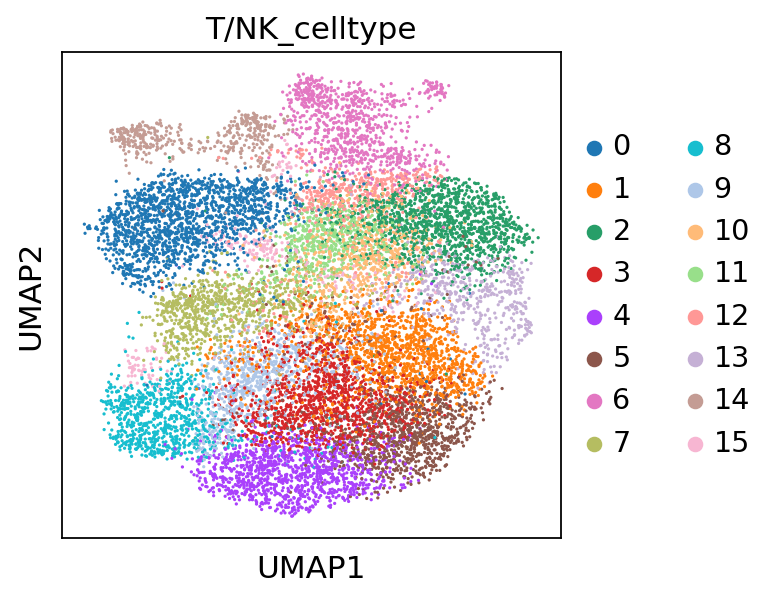

In [ ]:
adata.obs['T/NK_celltype'] = adata.obs['leiden']
sc.pl.umap(adata,color=['T/NK_celltype'],wspace=0.4)

In [ ]:
for i in adata.obs['leiden'].cat.categories:
  number = len(adata.obs[adata.obs['leiden']==i])
  print('the number of category {} is {}'.format(i,number))

the number of category 0 is 1648
the number of category 1 is 1326
the number of category 2 is 1302
the number of category 3 is 1240
the number of category 4 is 1209
the number of category 5 is 1079
the number of category 6 is 876
the number of category 7 is 813
the number of category 8 is 810
the number of category 9 is 777
the number of category 10 is 656
the number of category 11 is 623
the number of category 12 is 516
the number of category 13 is 493
the number of category 14 is 438
the number of category 15 is 281


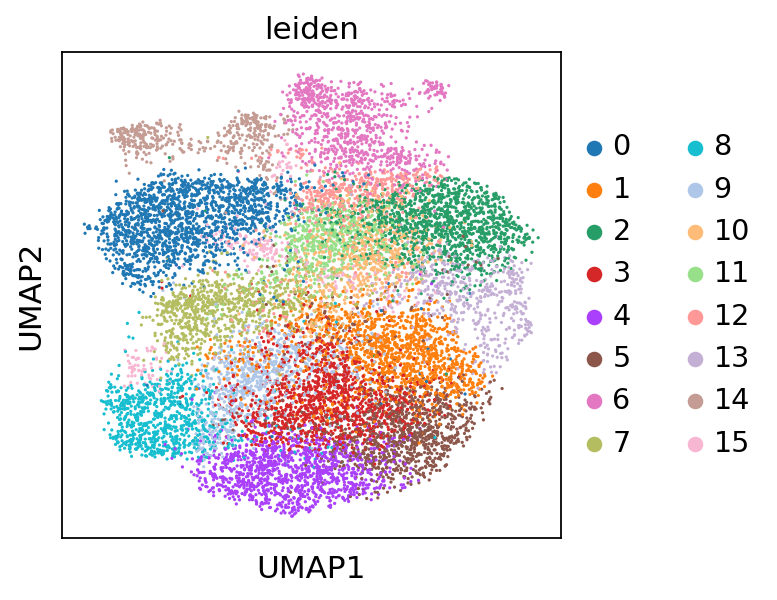

In [ ]:
sc.pl.umap(adata,color=['leiden'],wspace=0.4)

## CD8,CD4,NK Annotation

In [ ]:
marker_genes_dict = {
    'CD4':['CD4'],
    'CD8':['CD8A','CD8B'],
    'NK':['NKG7']
}

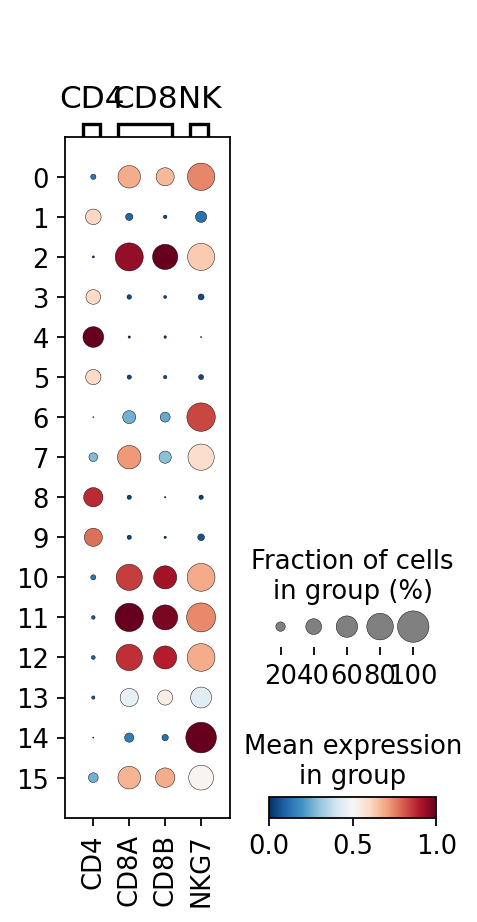

In [ ]:
#sc.tl.dendrogram(adata,groupby='major_celltype')
sc.pl.dotplot(
    adata,
    marker_genes_dict,
    groupby='leiden',
    dendrogram=False,
    color_map="RdBu_r",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
)

In [ ]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    '0': 'CD8',#上皮细胞
    '1': 'CD4',
    '2': 'CD8',
    '3': 'CD4',
    '4': 'CD4',
    '5': 'CD4',
    '6': 'NK',
    '7': 'CD8',
    '8': 'CD4',
    '9': 'CD4',
    '10': 'CD8',
    '11': 'CD8',
    '12': 'CD8',
    '13': 'CD8',
    '14': 'NK',
    '15': 'CD8',
}
adata.obs['T/NK_type'] = 0
adata.obs['T/NK_type'] = adata.obs['leiden'].map(cluster2annotation).astype('category')

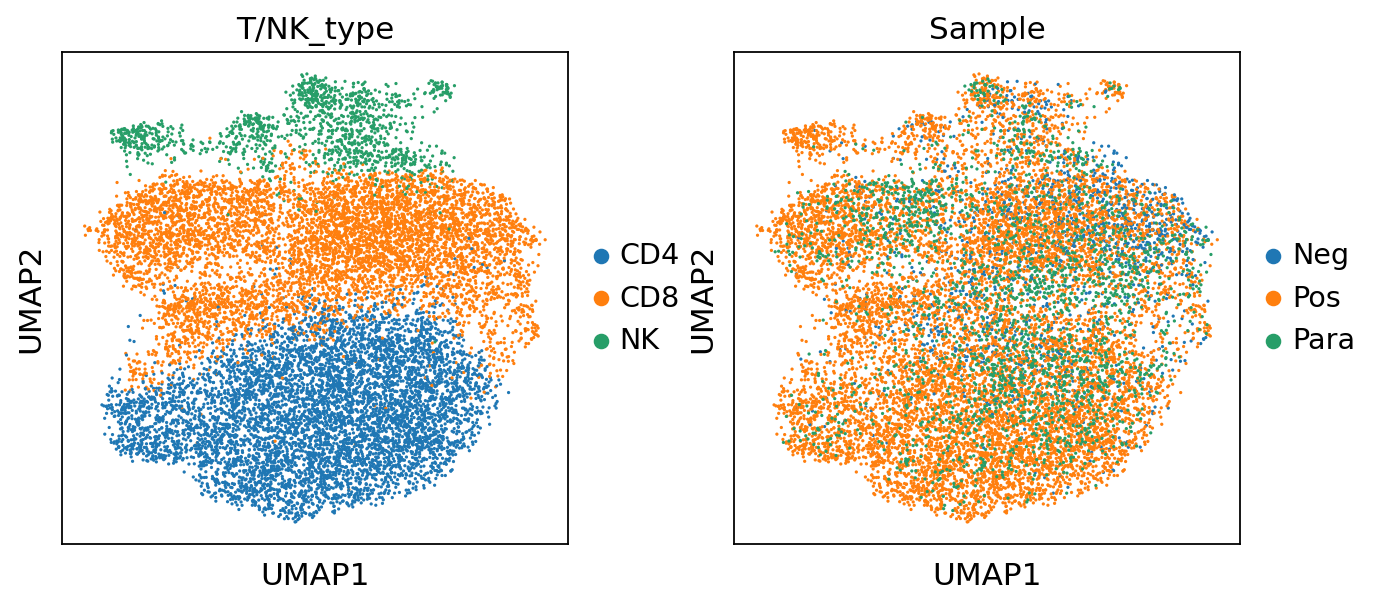

In [ ]:
sc.pl.umap(adata,color=['T/NK_type','Sample'])

## CD4 Annotation

In [ ]:
# create a dictionary to map cluster to annotation label
adata_CD4 = adata[adata.obs['T/NK_type']=='CD4',:]
adata_CD4

View of AnnData object with n_obs × n_vars = 6441 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors', 'T/NK_type_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

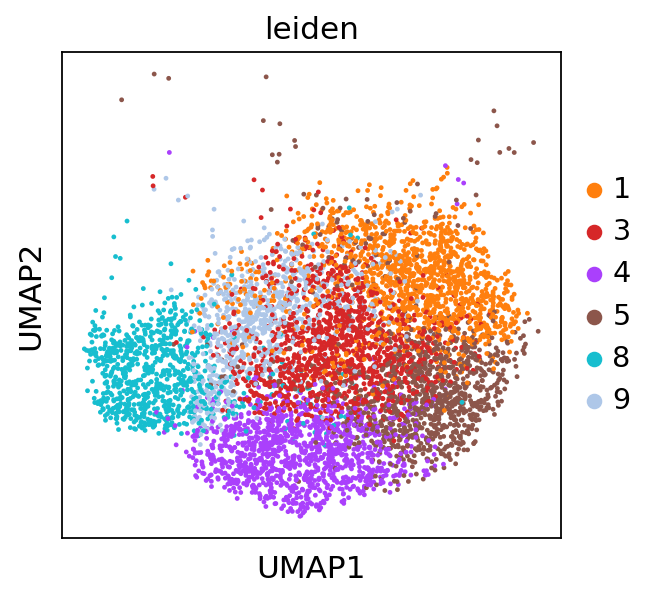

In [ ]:
sc.pl.umap(adata_CD4,color=['leiden'])

In [ ]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    '8': 'CD4.T.Reg',
    '1': 'CD4.T.Tissue_Resident_Memory',
    '9': 'CD4.T.Tissue_Resident_Memory',
    '4': 'CD4.T.Follicular_Helper',
    '3': 'CD4.T.Naive',
    '5': 'CD4.T.Naive',
}
adata_CD4.obs['T/NK_celltype'] = adata_CD4.obs['leiden'].map(cluster2annotation).astype('category')

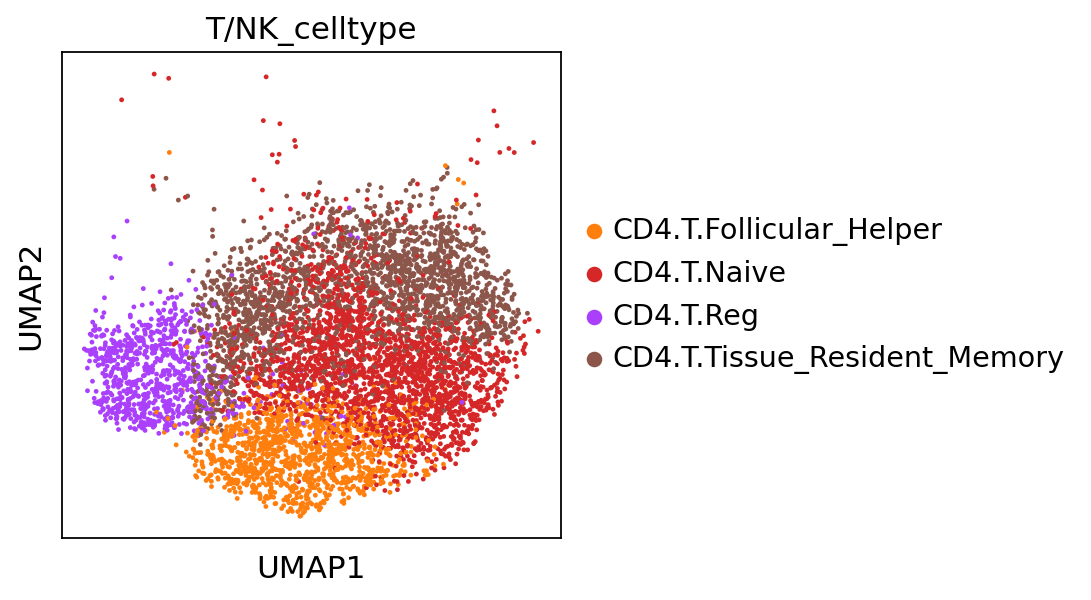

In [ ]:
sc.pl.umap(adata_CD4,color=['T/NK_celltype'])

In [ ]:
marker_genes_dict = {
    'CD4.T.Tissue_Resident_Memory':['S100A4','KLRB1','CD69','IL7R','NR4A1',], 
    'CD4.T.Naive':['CCR7','KLF2','ICAM2','S1PR1','PLAC8'],    #'CCR7','LEF1','KLF2','PLAC8','ICAM2',
    'CD4.T.Follicular_Helper':['TOX','TOX2','ICOS','CXCR5','PDCD1'],#'CXCR5','ICOS','PDCD1','BCL6','IL21',
    'CD4.T.Reg':['FOXP3','CTLA4','TNFRSF4','IL1R1','IL2RA'], #'FOXP3','IL2RA','IKZF2','TNFRSF9','IL1R2','LAIR2','IL1R1' 
    }
# reference: https://www.jianshu.com/p/0c745b965620
# https://zhuanlan.zhihu.com/p/356721971

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_T/NK_celltype']`


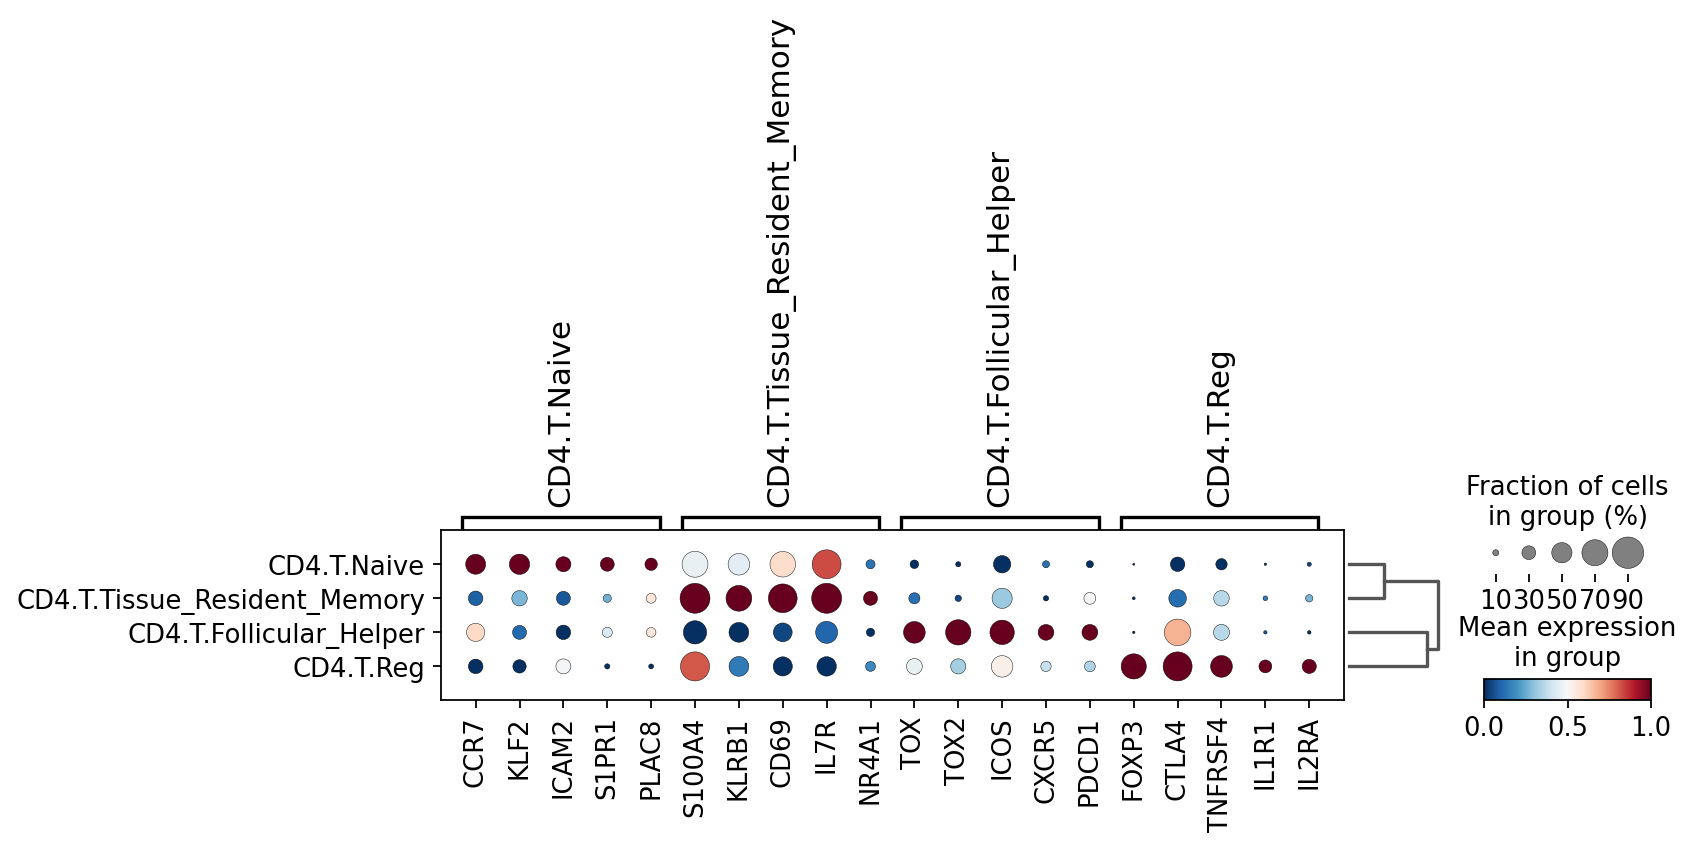

In [ ]:
sc.tl.dendrogram(adata_CD4,groupby='T/NK_celltype')
sc.pl.dotplot(
    adata_CD4,
    marker_genes_dict,
    groupby='T/NK_celltype',
    dendrogram=True,
    color_map="RdBu_r",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
)

## CD8 Annotation

### 清除其中的CD4细胞 

In [ ]:
# create a dictionary to map cluster to annotation label
adata_CD8 = adata[adata.obs['T/NK_type']=='CD8',:]
adata_CD8

View of AnnData object with n_obs × n_vars = 6332 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors', 'T/NK_type_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

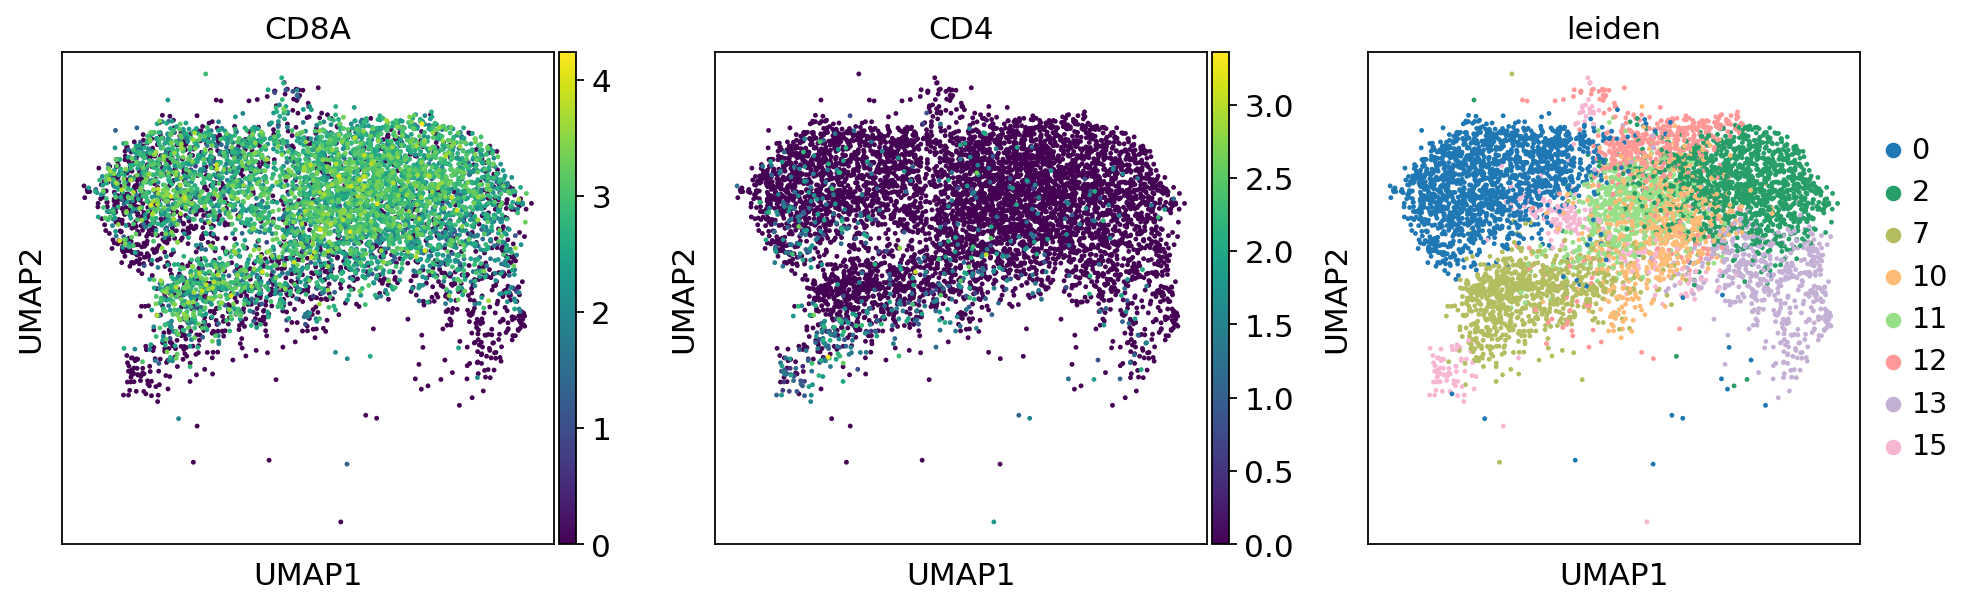

In [ ]:
sc.pl.umap(adata_CD8,color=['CD8A','CD4','leiden'])

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


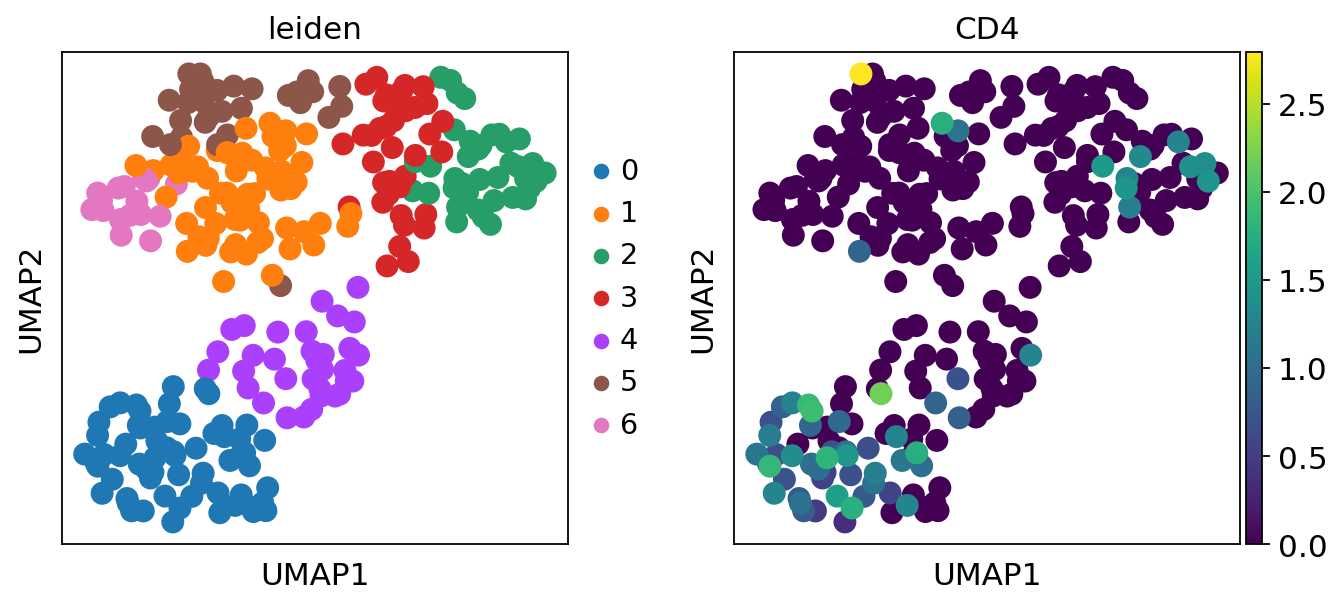

In [ ]:
adata_CD8_15 = adata_CD8[adata_CD8.obs['leiden']=='15']
sc.pp.neighbors(adata_CD8_15, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
sc.tl.leiden(adata_CD8_15)
sc.tl.paga(adata_CD8_15)
sc.pl.paga(adata_CD8_15, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_CD8_15,init_pos='paga')
sc.pl.umap(adata_CD8_15,color=['leiden','CD4'])

In [ ]:
adata_CD8_15_list = adata_CD8_15[adata_CD8_15.obs['leiden']=='0'].obs.index
adata_CD8_15_list

Index(['ACATCAGTCGGATGTT-1_0', 'CCCAGTTTCGACGGAA-1_0', 'TCTGGAAGTACCGGCT-1_0',
       'GGGAGATTCGCGGATC-1_1', 'TCGGGACTCTTGCATT-1_1', 'ATTGGACAGTACATGA-1_2',
       'GTACTTTAGTGAAGAG-1_2', 'CGGACGTTCGCCTGTT-1_3', 'TGCTGCTGTTCAGGCC-1_3',
       'AAGTCTGCATGATCCA-1_4', 'ACCCACTCATTTGCTT-1_4', 'ACGAGCCTCACGCATA-1_4',
       'ACGGGCTGTCTCGTTC-1_4', 'AGGGAGTTCCCTAACC-1_4', 'AGGTCCGGTGATAAAC-1_4',
       'ATAAGAGTCATGTAGC-1_4', 'CAGGTGCGTTAAGAAC-1_4', 'CATCAAGAGAGTACAT-1_4',
       'CCGTGGACAGTCAGAG-1_4', 'CCTCTGATCCAAACTG-1_4', 'CGAGAAGCATCCCATC-1_4',
       'CGTTCTGAGCTAGTGG-1_4', 'CGTTCTGGTAGTGAAT-1_4', 'CTCTACGCAGCGATCC-1_4',
       'GACCTGGCAATGGATA-1_4', 'GAGCAGAAGACTGTAA-1_4', 'GCCAAATTCATGTGGT-1_4',
       'GCGCAACCATATGAGA-1_4', 'GGCAATTGTCCTCCAT-1_4', 'GTAGTCATCAACGGGA-1_4',
       'GTATTCTTCCGATATG-1_4', 'GTGGGTCAGGTGATTA-1_4', 'TACCTTAAGTTCGATC-1_4',
       'TACGGATGTATCAGTC-1_4', 'TAGACCACAAATCCGT-1_4', 'TCGCGTTGTCTTGATG-1_4',
       'TCTTCGGAGGAGTTTA-1_4', 'TGGGAAGCAAAGGCGT-1_4

In [ ]:
adata_CD8

View of AnnData object with n_obs × n_vars = 6332 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors', 'T/NK_type_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
adata_CD8_list = adata_CD8.obs.index
adata_CD8_list = adata_CD8_list.tolist()
for i in adata_CD8_15_list:
  adata_CD8_list.remove(i)
len(adata_CD8_list)
# 替换数据
adata_CD8 = adata_CD8[adata_CD8_list]
adata_CD8

View of AnnData object with n_obs × n_vars = 6268 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors', 'T/NK_type_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

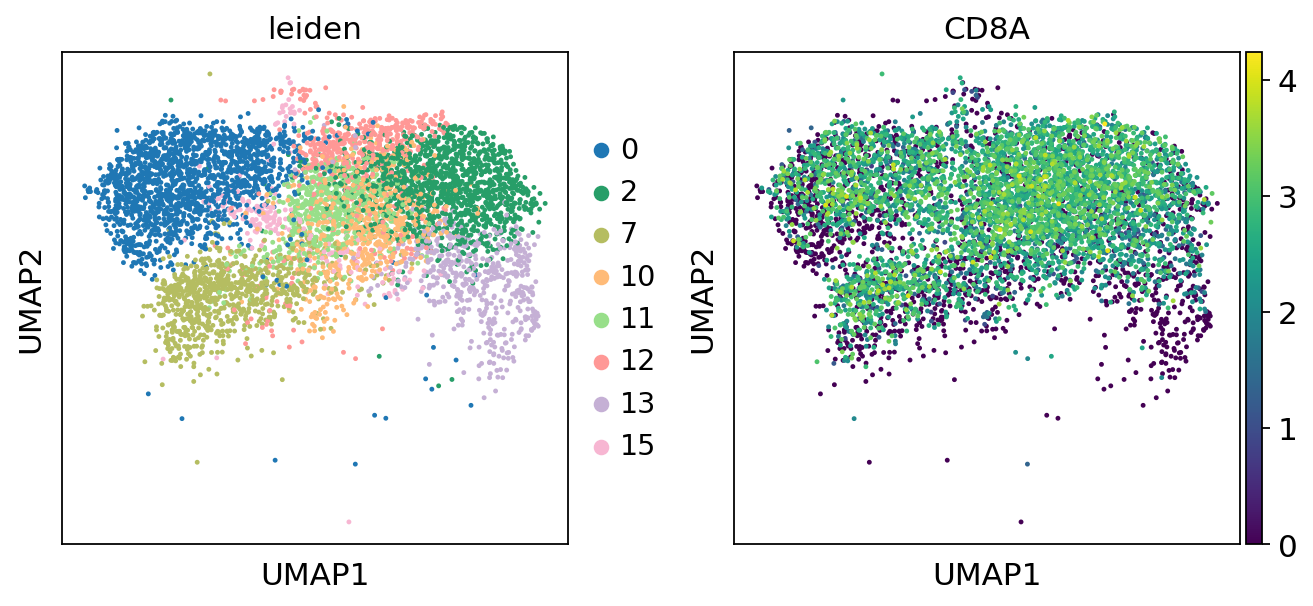

In [ ]:
sc.pl.umap(adata_CD8,color=['leiden','CD8A'])

### 注释

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_T/NK_celltype']`


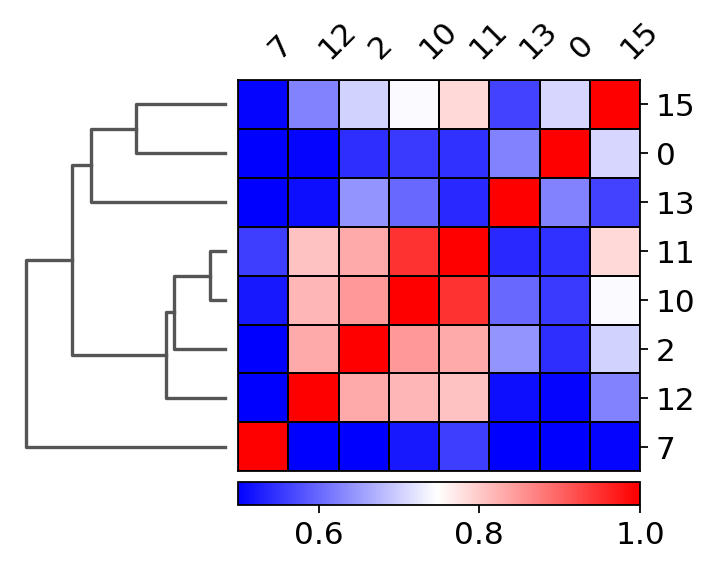

In [ ]:
ax = sc.pl.correlation_matrix(adata_CD8, 'T/NK_celltype', figsize=(5,3.5),vmin=0.5)

In [ ]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    '7': 'CD8.T.MAIT_Ex',
    '0': 'CD8.T.Effector_Memory',
    '2': 'CD8.T.Tissue_Resident_Memory',
    '10': 'CD8.T.Tissue_Resident_Memory',
    '11': 'CD8.T.Tissue_Resident_Memory',
    '12': 'CD8.T.Tissue_Resident_Memory',
    '15': 'CD8.T.Tissue_Resident_Memory',
    '13': 'CD8.T.Early_Activated'
}
adata_CD8.obs['T/NK_celltype'] = adata_CD8.obs['leiden'].map(cluster2annotation).astype('category')

In [ ]:
marker_genes_dict = {
    'CD8.T.MAIT':['KLRB1','RORA','NCR3','SLC4A10','ZBTB16'], #'SLC4A10','CCR6','DPP4','IL4I1','KLRB1','RORC','ZBTB16','KLRB1','NCR3','RORA' 
    # 黏膜相关不变T细胞 (Mucosal-associated T cells, MAIT)是一种进化保守的T细胞亚群
    #，通过T细胞受体介导识别来自维生素B2生物合成途径的代谢产物来对大多数细菌发生反应。
    # 这个亚群高表达CD69，DUSP1，FOS 和 JUN 等早期激活标志物或即刻早期应答基因(IEG) 
    'CD8.T.Exhausted':['LAG3','CTLA4','TIGIT','HAVCR2','PDCD1'], #'LAG3','CTLA4','TIGIT','ENTPD1','TOX2' 
    # 在此，表达(炎症驱动)衰竭定义免疫检查点(HAVCR2，CTLA4，LAG3)区分 TEX 细胞
    'CD8.T.Effector_Memory':['GZMK','GZMM','CXCR4','CD74','GZMH',], #  CD8+细胞毒性T淋巴细胞(CTL) 等价于 CD8效应记忆细胞
    'CD8.T.Early_Activated':['DUSP1','FOS','FOSB','JUN','CD69'], 
    # CD69, DUSP1, FOS, and JUN are either
    # early activation markers or immediate early response genes (IEGs), 
    'CD8.T.Tissue_Resident_Memory':['CAPG','ITGA1','ITGAE','ZNF683','GZMB'], # )高度表达ITGA1和ZNF683，表明其组织驻留能力
    }


# 5组和11组很相似
# reference: https://www.jianshu.com/p/0c745b965620
# https://zhuanlan.zhihu.com/p/356721971
# https://www.nature.com/articles/s41422-020-00455-9/figures/2
# MAIT: https://www.nature.com/articles/s41467-021-21928-4

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_T/NK_celltype']`
categories: CD8.T.Early_Activated, CD8.T.Effector_Memory, CD8.T.MAIT_Ex, etc.
var_group_labels: CD8.T.MAIT, CD8.T.Exhausted, CD8.T.Effector_Memory, etc.


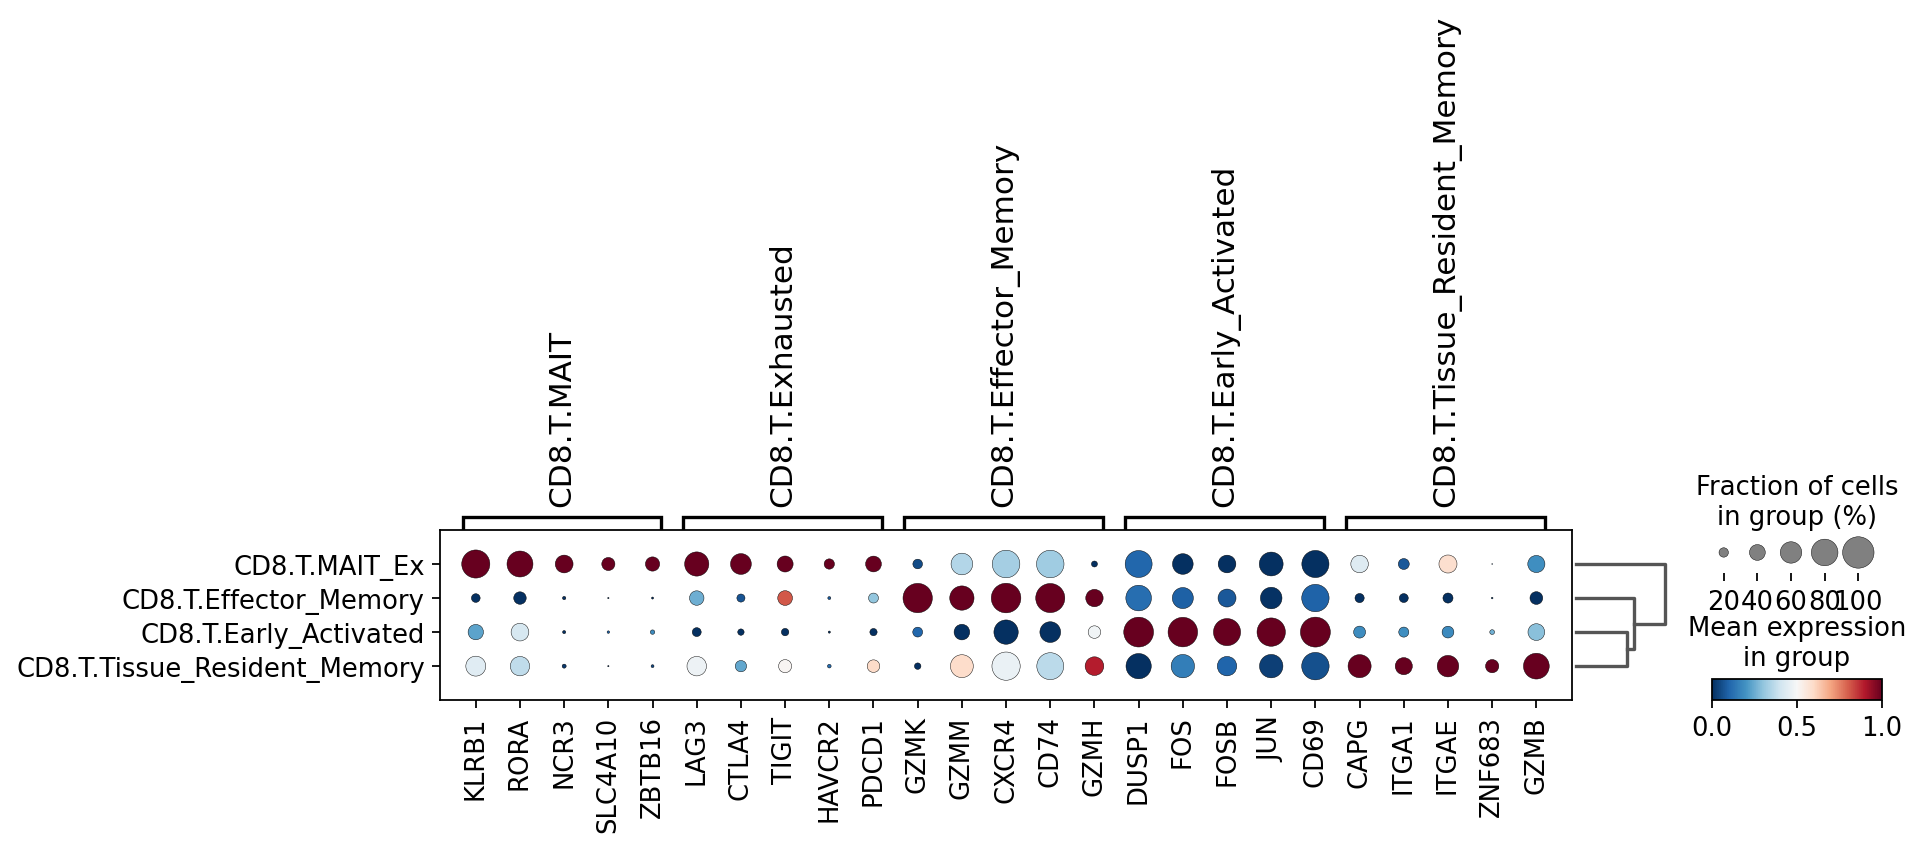

In [ ]:
sc.tl.dendrogram(adata_CD8,groupby='T/NK_celltype')
sc.pl.dotplot(
    adata_CD8,
    marker_genes_dict,
    groupby='T/NK_celltype',
    dendrogram=True,
    color_map="RdBu_r",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
)

## Overivew annotation

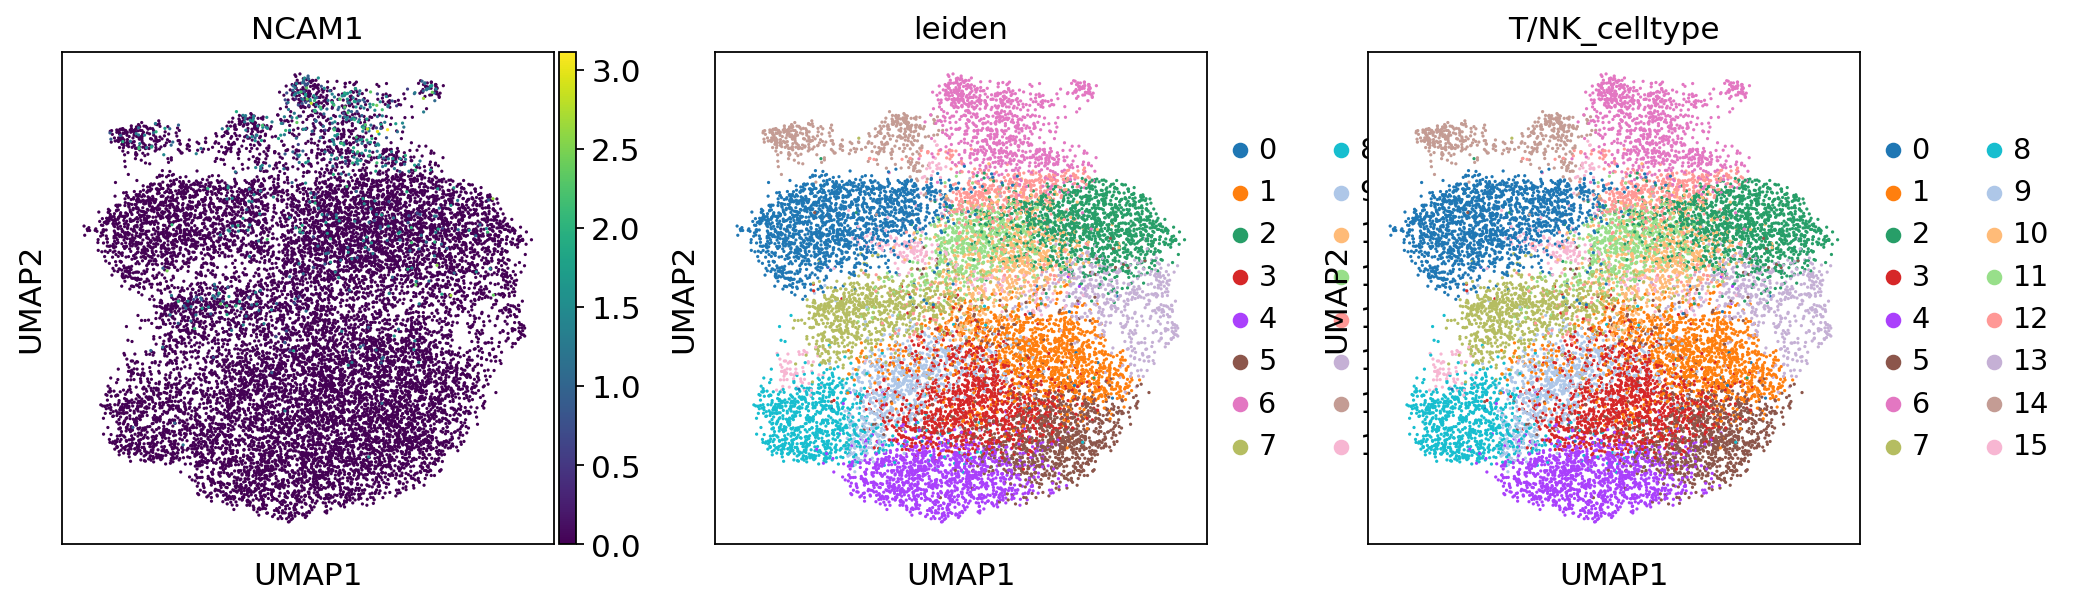

In [ ]:
sc.pl.umap(adata,color=['NCAM1','leiden','T/NK_celltype'])

In [ ]:
adata_list = adata.obs.index
adata_list = adata_list.tolist()
for i in adata_CD8_15_list:
  adata_list.remove(i)
len(adata_list)
# 替换数据
adata = adata[adata_list]
adata

View of AnnData object with n_obs × n_vars = 14023 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors', 'T/NK_type_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    '8': 'CD4.Reg',
    '1': 'CD4.RM',
    '9': 'CD4.RM',
    '4': 'CD4.FH',
    '3': 'CD4.Naive',
    '5': 'CD4.Naive',
    '7': 'CD8.MAIT',#(exhausted)
    '0': 'CD8.EM',
    '2': 'CD8.RM',
    '10': 'CD8.RM',
    '11': 'CD8.RM',
    '12': 'CD8.RM',
    '15': 'CD8.RM',
    '13': 'CD8.EA',
    '6': 'NK.CD56_Bright',
    '14': 'NK.CD56_Dim'
}
adata.obs['T/NK_celltype'] = adata.obs['leiden'].map(cluster2annotation).astype('category')

In [ ]:
marker_genes_dict = {
    'CD4.RM':['S100A4','KLRB1','PTGER4','IL7R','NR4A1',], 
    'CD4.Naive':['CCR7','KLF2','ICAM2','S1PR1','PLAC8'],    #'CCR7','LEF1','KLF2','PLAC8','ICAM2',
    'CD4.FH':['TOX','TOX2','ICOS','CXCR5','PDCD1'],#'CXCR5','ICOS','PDCD1','BCL6','IL21',
    'CD4.Reg':['FOXP3','CTLA4','TNFRSF4','IL1R1','IL2RA'], #'FOXP3','IL2RA','IKZF2','TNFRSF9','IL1R2','LAIR2','IL1R1' 
    'NK.CD56_Bright':['NCAM1','GZMB','KLRC2','KLRD1'],
    'NK.CD56_Dim':['NKG7','CST7','DUSP2','PRF1'],
    'CD8.MAIT':['KLRB1','RORA','NCR3','SLC4A10','ZBTB16'], #'SLC4A10','CCR6','DPP4','IL4I1','KLRB1','RORC','ZBTB16','KLRB1','NCR3','RORA' 
   # 'CD8.T.Exhausted':['LAG3','CTLA4','TIGIT','HAVCR2','PDCD1'], #'LAG3','CTLA4','TIGIT','ENTPD1','TOX2' 
    'CD8.EM':['GZMK','GZMM','CXCR4','CD74','GZMH',], #  CD8+细胞毒性T淋巴细胞(CTL) 等价于 CD8效应记忆细胞
    'CD8.EA':['DUSP1','FOS','FOSB','JUN','CD69'], 
    'CD8.RM':['CAPG','ITGA1','ITGAE','ZNF683','GZMB'], # )高度表达ITGA1和ZNF683，表明其组织驻留能力
  
}
# reference: https://www.jianshu.com/p/0c745b965620

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_T/NK_celltype']`


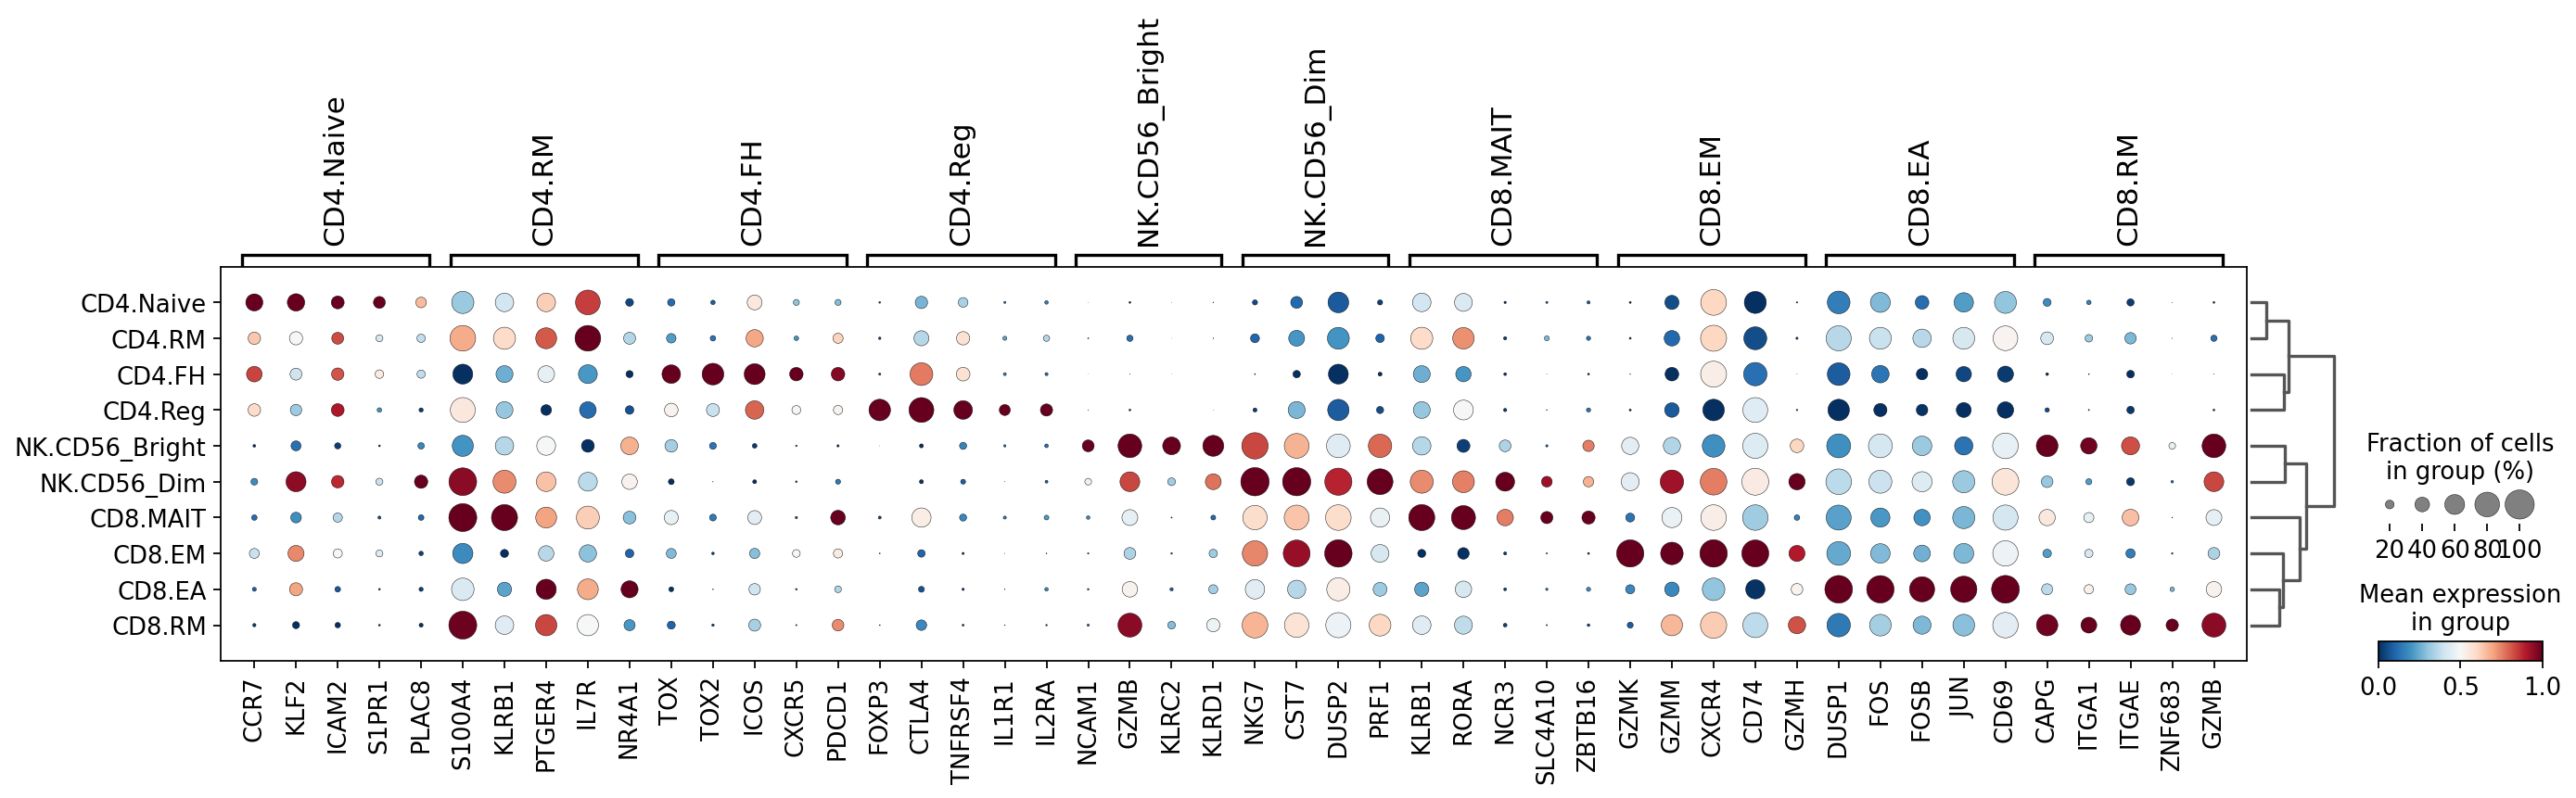

In [ ]:
sc.tl.dendrogram(adata,groupby='T/NK_celltype')
sc.pl.dotplot(
    adata,
    marker_genes_dict,
    groupby='T/NK_celltype',
    dendrogram=True,
    color_map="RdBu_r",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
)

In [ ]:
sc.pl.umap(adata,color=['leiden','T/NK_type','T/NK_celltype','Sample','Person'],wspace=0.2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
adata.write('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_NKT_anno.h5ad',compression='gzip')